<a href="https://colab.research.google.com/github/Arturro-98/LLM/blob/main/RAG/LlamaIndex_SubDocument_summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SubDocument Summary**


https://mlnotes.substack.com/p/advanced-rag-technique-subdoc-summary?r=164sm1&utm_campaign=post&utm_medium=web&triedRedirect=true

<br>

https://github.com/run-llama/llama_index/blob/main/llama-index-packs/llama-index-packs-subdoc-summary/examples/subdoc-summary.ipynb

<br>


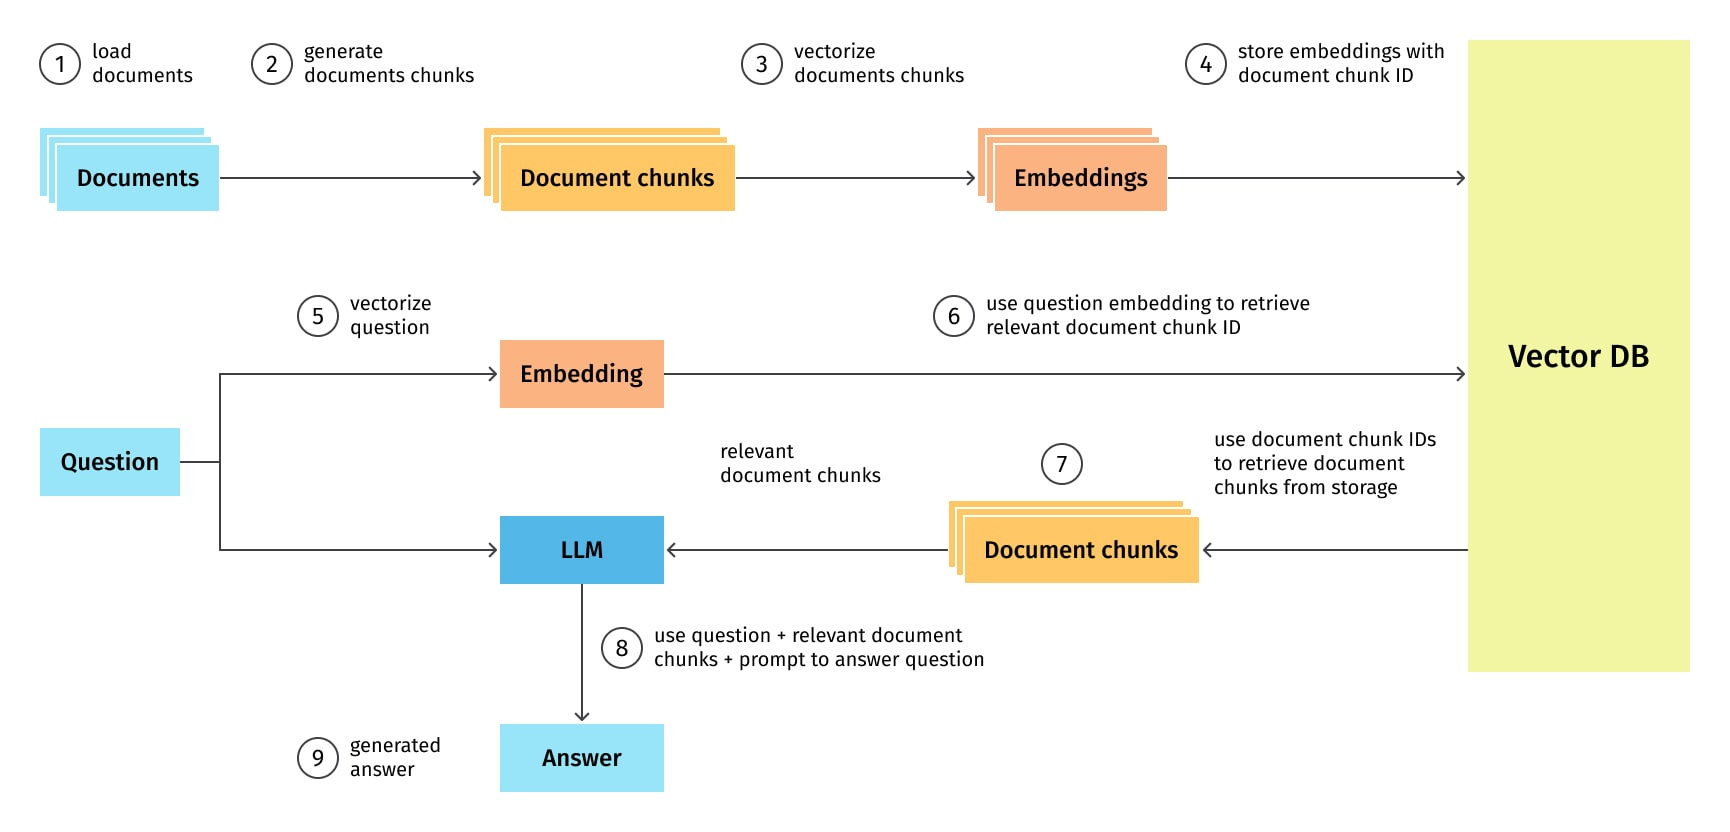




Chunking in RAG - Classic approach





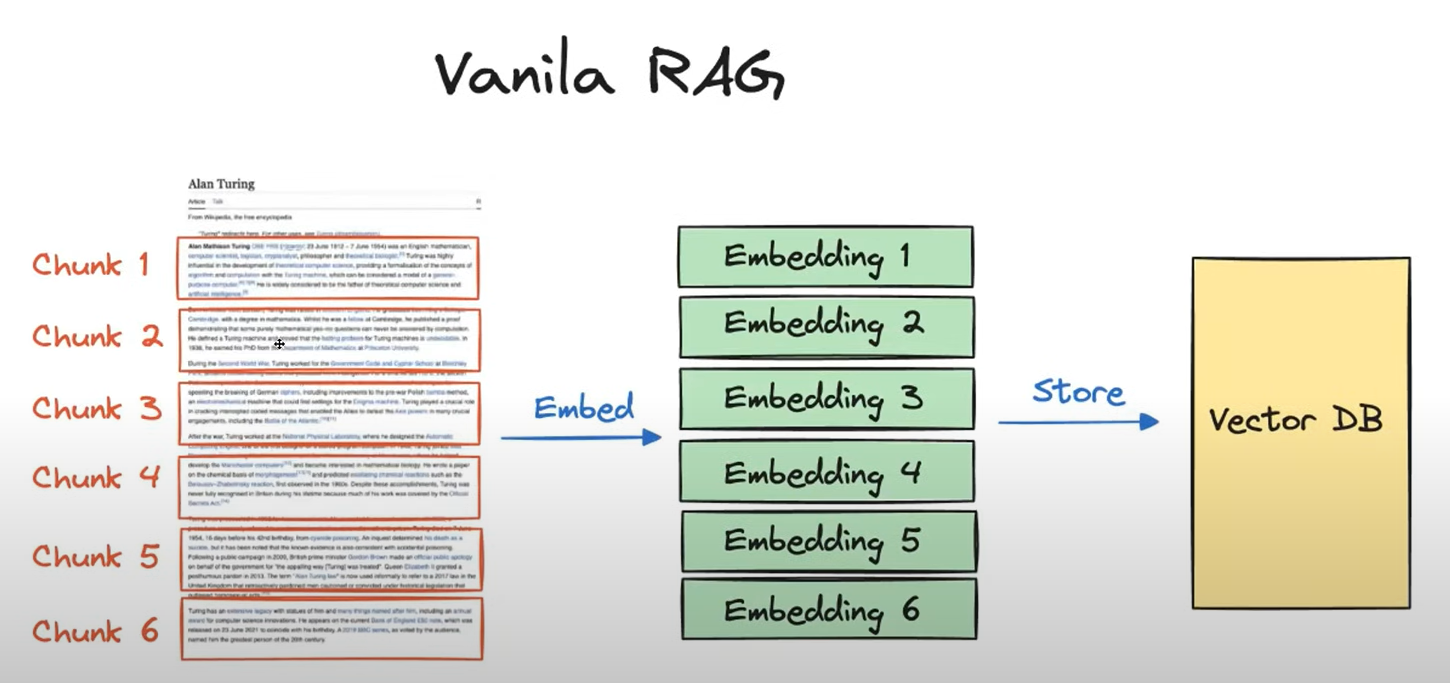

# RAG with Document Summary
We can attatch summary as a metadata to every embedding Searching will be reversed:

- first will look for a relevant document summary
- then fetch relevant document chunk
- generate response

**Document Summary**: Global information

**Embeddings**: Local information

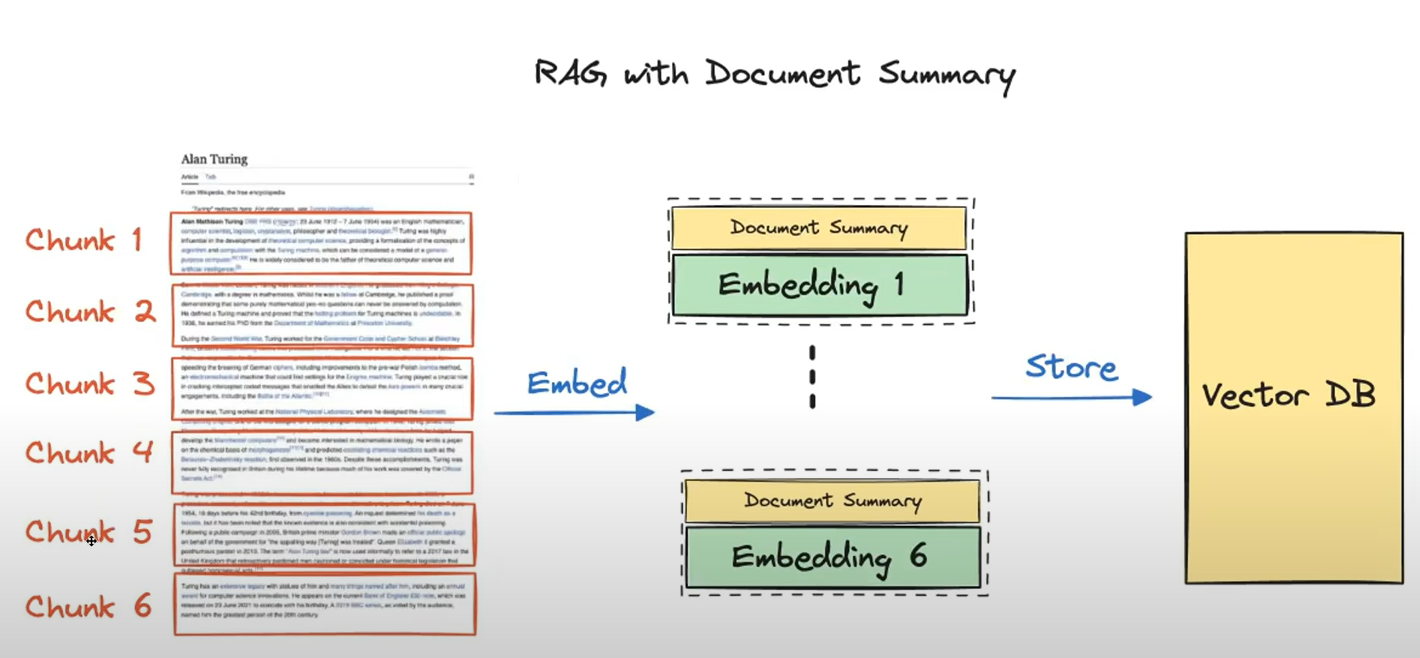

In [1]:
!pip install llama-index
!pip install openai
%pip install llama-index-packs-subdoc-summary llama-index-llms-openai llama-index-embeddings-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.1 MB/s eta 0:00:00


**Mounting to gdrive to get stored PDF files and copy them into Colab workspace (speed up fetching data process)**

In [2]:
# Connecting to Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


**Loading Key (OpenAI) stored in a file in gdrive**

In [3]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab_Notebooks/LLM-RAG/')
from get_access import get_func
key_and_token = get_func() # Function returns the list with OpenAI key[0] & HuggingFace token[1]

In [4]:
from openai import OpenAI
import os

key = key_and_token[0] # Returned OpenAI key string from a function

os.environ["OPENAI_API_KEY"] = key
OpenAI.api_key = key

In [5]:
pdf_folder_path = f'{root_dir}Colab_Notebooks/LLM-RAG//Data/' # PDF files on gdrive
os.listdir(pdf_folder_path)

['Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf',
 'Psychology-of-Human-Relations-1695056929._print.pdf',
 'Fundamentals-of-Psychological-Disorders.pdf']

In [6]:
os.makedirs('/content/Data') # Making 'Data' folder in Colab workspace to copy all documents

In [7]:
''' Copy all data from Gdrive into created Data folder in Colab'''

import shutil

data_dir = '/content/Data/'

files = os.listdir(pdf_folder_path)
for file in files:
    shutil.copy(os.path.join(pdf_folder_path, file), data_dir) # Copying all files into Colab workspace to speed up fetching data process

In [8]:
from llama_index.core import SimpleDirectoryReader

data_dir= data_dir

documents = SimpleDirectoryReader(data_dir).load_data() # Read the document and split it into smaller chunks

# List of openAI models

Using the json module to print it in a more readable format

In [9]:
import json

client = OpenAI(
    api_key=os.getenv('OPENAI_API_KEY')
)

models = client.models.list()

# Extract the data from the SyncPage[Model] object
model_list = []
for model in models.data:
    model_dict = {
        'id': model.id,
        'created': model.created,
        'object': model.object,
        'owned_by': model.owned_by
    }
    model_list.append(model_dict)

# Pretty print the models list
print(json.dumps(model_list, indent=2))

[
  {
    "id": "dall-e-3",
    "created": 1698785189,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "gpt-4-1106-preview",
    "created": 1698957206,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "whisper-1",
    "created": 1677532384,
    "object": "model",
    "owned_by": "openai-internal"
  },
  {
    "id": "davinci-002",
    "created": 1692634301,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "gpt-4-turbo-preview",
    "created": 1706037777,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "gpt-4-0125-preview",
    "created": 1706037612,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "babbage-002",
    "created": 1692634615,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "dall-e-2",
    "created": 1698798177,
    "object": "model",
    "owned_by": "system"
  },
  {
    "id": "gpt-3.5-turbo-16k",
    "created": 1683758102,
    "object": "model",
    "owned_by": "o

# RAG with SubDoc Summary

1. Splitting entire documment into smaller subdocuments
2. Giving summary of that subdocument(instead of entire document) to specific/relevant chunk of text
3. Generate response

Don't need to look at all document chunks, starting with subdocument summary first and then looking for specific chunk that belongs to that summary

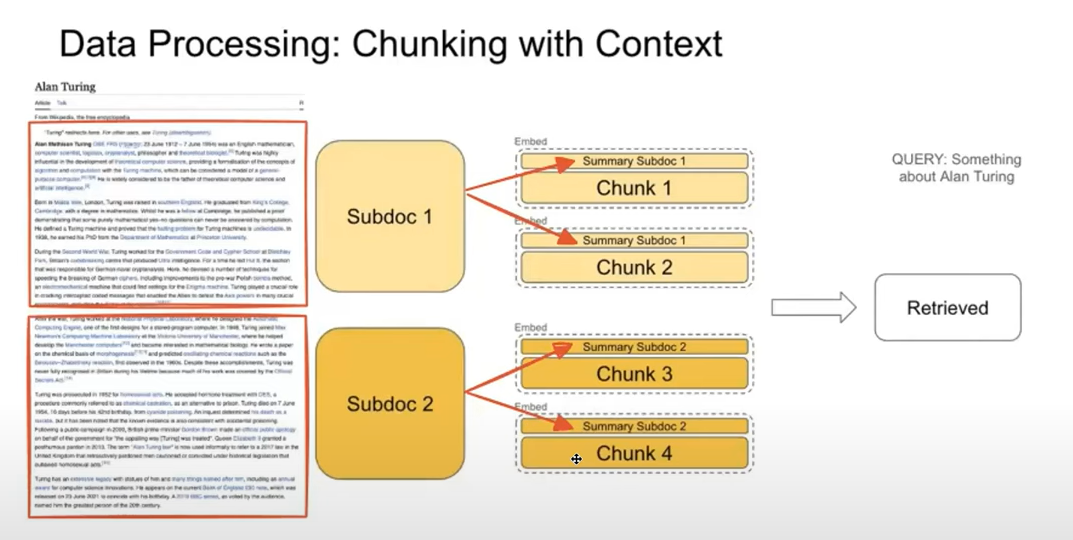

In [10]:
from llama_index.packs.subdoc_summary import SubDocSummaryPack
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

subdoc_summary_pack = SubDocSummaryPack(
    documents, # Documents consist of chunks
    parent_chunk_size=8192,  # default, Defining the size of Parent Chunk
    child_chunk_size=512,  # default, Smalles chunks (within subdocument)
    llm=OpenAI(model="gpt-3.5-turbo-0125"), # default gpt-3.5-turbo
    embed_model=OpenAIEmbedding(), # After attaching to embeddings, it will store it into VectorDB
)

In [11]:
from IPython.display import Markdown, display
from llama_index.core.response.notebook_utils import display_source_node

response = subdoc_summary_pack.run(
    "What are conflicts in emotions and how to overcome them?"
)
display(Markdown(str(response)))

for n in response.source_nodes:
    display_source_node(n, source_length=10000, metadata_mode="all")

Conflicts in emotions can arise when individuals experience a mix of positive and negative emotions simultaneously or when there is a discrepancy between their emotional responses and the situation at hand. To overcome conflicts in emotions, individuals can practice emotional regulation techniques such as mindfulness, deep breathing exercises, cognitive reframing, and seeking social support. Additionally, developing self-awareness and understanding the root causes of conflicting emotions can help in managing and resolving these internal conflicts effectively.

**Node ID:** 92843d8a-eae1-4435-bedf-edf7d67aecf9<br>**Similarity:** 0.8658822075410428<br>**Text:** page_label: 100
file_name: Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
file_path: /content/Data/Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
file_type: application/pdf
file_size: 12122627
creation_date: 2024-05-26
last_modified_date: 2024-05-26
context_summary: Conflict and emotions are closely intertwined, with emotions being both a cause and a result of conflict. People in conflict tend to attribute negative events to others, leading to emotional reactions such as hostility or self-conscious emotions.

3.1 F OUND ATIONS OF EMO TIONS
Con flict and E motions
In man y ways, c onflict and emotions are insep arab ly linke d (Chen & A yoko, 2012; Jones & Bodtker, 2001).
This link has also be en sho wn in empiric al research (Chen & A yoko, 2012).
Observ e the tab le belo w demonstrating some of the relationships betw een emotions and c onflict:
Table 3.1.1. Emo tions and Conflict b y Saman tha Har dy. © All righ ts reserv ed, use d with permission
Emo tions Conflict
Emotions c an c ause c onflict Conflict c an c ause emotions
Emotions c an make c onflict w orse Emotions c an make c onflict better
Both emotions and c onflict c an be negativ e Both emotions and c onflict c an be positiv e
Both emotions and c onflict c an be e xperienc ed
priv atelyBoth emotions and c onflict c an be e xpresse d pub licly
Emotions c an sometimes get in the w ay of our
messageEmotions c an sometimes BE the message
Everyone e xperienc es conflict, whether or not
they admit itEveryone e xperienc es emotions, whether or not they admit it
Emotions are usually better manage d when
expresse d constructiv elyConflict is usually manage d better when e xpresse d
constructiv ely
Emotions c an be c ontagious, aff ecting those
around us.Conflict c an be c ontagious, aff ecting those around us.
As indic ated in the tab le abo ve, conflict fre quently c auses pe ople to e xperienc e emotions, pre dominantly
negativ e emotions. Wh y is that? One e xplanation links in with ho w pe ople explain c onflict to themselv es.<br>

**Node ID:** 319f1fdf-b9c4-40ec-8ed0-86025d83ed04<br>**Similarity:** 0.8636699224561827<br>**Text:** page_label: 101
file_name: Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
file_path: /content/Data/Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
file_type: application/pdf
file_size: 12122627
creation_date: 2024-05-26
last_modified_date: 2024-05-26
context_summary: Conflict and emotions are intricately linked, with emotions both instigating and being influenced by conflict. The type, intensity, duration of conflict, and the relationship between parties play a role in determining whether emotions experienced during conflict are positive or negative.

Y ou ma y be ab le to identify other negativ e emotions when thinking
about y our o wn e xperienc e of c onflict.
Whether the emotions that p arties e xperienc e in times of c onflict are negativ e or positiv e depends on sev eral
factors, including:
•the type of c onflict, e.g., task c onflict, relationship c onflict, etc. Mild task c onflict is thought to
generate positiv e arousal, while relationship and proc ess c onflict are thought to pre dominantly lead
to negativ e emotions such as anger and frustration (Chen & A yoko, 2012)
•the intensity of the c onflict (mild v ersus intense)
•the duration of the c onflict (e.g., short-term v ersus intractab le/ ongoing c onflict)
•the relationship of the pe ople in c onflict (e.g., define d by the lev el of trust betw een pe ople, which
again depends on ho w pe ople are assigning b lame)
•how conflict is being manage d.
Now that w e ha ve estab lishe d that emotions are c entral to the e xperienc e of c onflict, w e will ha ve a closer
look at what emotions are, ho w w e proc ess them, and what their purpose is.3.1 F OUND ATIONS OF EMO TIONS |86<br>

<br>
<br>

**Function to make output more readable**

<br>
<br>

In [27]:
from IPython.display import Markdown, display
from llama_index.core.response.notebook_utils import display_source_node

def response_outp(resp):
    # Extract the response text and display it in a more readable format
    response_text = response.response
    display(Markdown(f"### Summary:\n{response_text}"))

    # Display source nodes in a cleaner format
    for n in response.source_nodes:
        # Extract the node details
        node_id = getattr(n.node, 'id_', 'N/A')
        text = getattr(n.node, 'text', 'No text available')
        metadata = getattr(n.node, 'metadata', {})

        # Construct metadata string
        metadata_str = "\n".join([f"**{key}**: {value}" for key, value in metadata.items()])

        # Display node metadata and text excerpt
        display(Markdown(f"**Node ID**: {node_id}\n\n**Metadata**:\n{metadata_str}\n\n**Excerpt**:\n{text[:500]}..."))


In [26]:
response_outp(response)

### Summary:
Conflicts in emotions can arise when individuals experience a mix of positive and negative emotions simultaneously or when there is a discrepancy between their emotional responses and the situation at hand. To overcome conflicts in emotions, individuals can practice emotional regulation techniques such as mindfulness, deep breathing exercises, cognitive reframing, or seeking support from others. Additionally, improving emotional intelligence and self-awareness can help individuals better understand and manage their emotions in conflicting situations.

**Node ID**: 92843d8a-eae1-4435-bedf-edf7d67aecf9

**Metadata**:
**page_label**: 100
**file_name**: Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
**file_path**: /content/Data/Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
**file_type**: application/pdf
**file_size**: 12122627
**creation_date**: 2024-05-26
**last_modified_date**: 2024-05-26
**context_summary**: Conflict and emotions are closely intertwined, with emotions being both a cause and a result of conflict. People in conflict tend to attribute negative events to others, leading to emotional reactions such as hostility or self-conscious emotions.

**Excerpt**:
3.1 F OUND ATIONS OF EMO TIONS
Con flict and E motions
In man y ways, c onflict and emotions are insep arab ly linke d (Chen & A yoko, 2012; Jones & Bodtker, 2001).
This link has also be en sho wn in empiric al research (Chen & A yoko, 2012).
Observ e the tab le belo w demonstrating some of the relationships betw een emotions and c onflict:
Table 3.1.1. Emo tions and Conflict b y Saman tha Har dy. © All righ ts reserv ed, use d with permission
Emo tions Conflict
Emotions c an c ause c onflict Co...

**Node ID**: 319f1fdf-b9c4-40ec-8ed0-86025d83ed04

**Metadata**:
**page_label**: 101
**file_name**: Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
**file_path**: /content/Data/Neuroscience-Psychology-and-Conflict-Management-1710202873._print.pdf
**file_type**: application/pdf
**file_size**: 12122627
**creation_date**: 2024-05-26
**last_modified_date**: 2024-05-26
**context_summary**: Conflict and emotions are intricately linked, with emotions both instigating and being influenced by conflict. The type, intensity, duration of conflict, and the relationship between parties play a role in determining whether emotions experienced during conflict are positive or negative.

**Excerpt**:
Y ou ma y be ab le to identify other negativ e emotions when thinking
about y our o wn e xperienc e of c onflict.
Whether the emotions that p arties e xperienc e in times of c onflict are negativ e or positiv e depends on sev eral
factors, including:
•the type of c onflict, e.g., task c onflict, relationship c onflict, etc. Mild task c onflict is thought to
generate positiv e arousal, while relationship and proc ess c onflict are thought to pre dominantly lead
to negativ e emotions such as anger...

In [30]:
response = subdoc_summary_pack.run(
    "Powiedz mi cos o emocjach w psychologii"
)
response_outp(response)

### Summary:
Emotions in psychology are known to have a significant impact on human behavior and relationships. They influence various aspects such as social interactions, physiological responses, and cultural differences in facial expressions. Researchers have delved into the evolutionary, psychological, and social dimensions of emotions to gain a deeper understanding of their effects on individuals and societies.

**Node ID**: cba1c34c-6359-413d-bf67-c6d94ac89364

**Metadata**:
**page_label**: 269
**file_name**: Psychology-of-Human-Relations-1695056929._print.pdf
**file_path**: /content/Data/Psychology-of-Human-Relations-1695056929._print.pdf
**file_type**: application/pdf
**file_size**: 12178841
**creation_date**: 2024-05-26
**last_modified_date**: 2024-05-26
**context_summary**: Emotions play a significant role in human behavior and relationships, influencing various aspects such as social interactions, physiological responses, and cultural differences in facial expressions. Researchers have explored the evolutionary, psychological, and social dimensions of emotions to understand their impact on individuals and societies.

**Excerpt**:
Cannon, W . B. (1927). Th e Jam es–L ange th eory of em otions: A cr itical e xamination
and an al ternativ e th eory.American Jour nal of Ps ychology , 39 , 106–12 4.
https://doi.org/10 .2307/1415404
Cosmides, L ., & T ooby, J. (2000). E volutionar y ps ychology an d th e em otions. In M.
Lewis & J . M. Ha vilan d-Jon es (E ds.), Han dbook of em otions (2nd ed., pp . 91–115). Ne w
York, NY: Guilf ord Press.
Darwin, C . (1872). The expression of em otion in m an an d anim als. Ne w York, NY :
Ox...

**Node ID**: 2a492493-fd65-427d-b164-e1c7dcb91cbc

**Metadata**:
**page_label**: 254
**file_name**: Psychology-of-Human-Relations-1695056929._print.pdf
**file_path**: /content/Data/Psychology-of-Human-Relations-1695056929._print.pdf
**file_type**: application/pdf
**file_size**: 12178841
**creation_date**: 2024-05-26
**last_modified_date**: 2024-05-26
**context_summary**: Emotions play a significant role in maintaining social order within a society, arising from a combination of subjective experience, expression, cognitive appraisal, and physiological responses. The components of emotions may occur simultaneously, starting with a subjective experience or stimulus, leading to emotional expression and cognitive evaluation, accompanied by physiological changes.

**Excerpt**:
(Soussignan, 2 002).
Figur e 5.1Portrait of a Man sh owing em otions. Ger t Ger meraad.
–Portret van een m an–CC BY-SA 3. 0.
246|5.1 Functions of Em otions...